# Project: Investigate factors affecting medical appointments show up in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset that I have chosen called No-show appointment. This dataframe includes total 110527 rows and 14 columns. From the data, I can see that patients sometimes did not show up for their scheduled appointments. What are the major reasons for their missing the appointments? By analyzing the dataframe, I want to find out what factors may be related to patients’ absence of their medical appointments. After looking at the data, the following questions are the ones that I want to address.

1) See which neighborhood is related to the most appointment show up.

2) See if message reminder is related to appointment show up.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
Before asking questions and doing analysis, it is important to check the data first to get the overall idea about what we have.

### General Properties

In [4]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Load the dataframe and get some ideas about what the columns are in the dataframe and what the values look like.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check if there are any data missing in each column. The result shows that there are no data missing.

### Data Cleaning 
The column called 'No-show' is not well named and the values in the columes is confusing. To make the dataset easy to understand, I am changing the column name 'No-show' to 'Show_up'. I also change the value of 'No' in 'No-show' to 'True' and the value of 'Yes' in 'No-show' to 'False'. A function is defined to convert the values in the dataframe. The value of '0' is changed to False and '1' is changed to True.

In [6]:
def convert_number(number):
    if number==1:
        return True
    elif number==0:
        return False
    else:
        return number

This function is to replace value of '0' in the dataframe to False and value of '1' to True. The name of the function is called convert_number. The variable 'number' refer to those values.

In [7]:
df.rename(columns={'No-show': 'Show_up'}, inplace=True)

In [8]:
df.replace({'Show_up': {'No': True, 'Yes': False}}, inplace=True)

Call function conver_number to convert the values in dataframe.

In [9]:
df.applymap(convert_number)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,False,False,True
5,9.600000e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,False,True,False,False,False,False,True
6,7.340000e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,False,False,False,False,False,False,False
7,3.450000e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,False,False,False,False,False,False,False
8,5.640000e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,False,False,False,False,False,False,True
9,7.810000e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,False,False,False,False,False,False,True


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Which neighbourhood has the most show ups?

In [12]:
df.groupby('Neighbourhood')['Show_up'].sum().idxmax()

'JARDIM CAMBURI'

The neighbourhood called JARDIM CAMBURI has the most patient show ups.


In [13]:
df.groupby('Neighbourhood')['Show_up'].sum().max()

6252.0

The number of patient show ups in neighbourhood JARDIM CAMBURI is 6252.

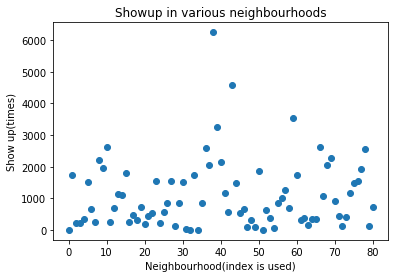

In [14]:
df2=df.groupby('Neighbourhood',as_index=False)['Show_up'].sum()
plt.scatter(df2.index, df2['Show_up'])
plt.xlabel('Neighbourhood(index is used)')
plt.ylabel('Show up(times)')
plt.title('Showup in various neighbourhoods')
plt.show()

Scatter plot is made to show the number of show ups in various neighbourhoods. The maximal show ups is over 6000.

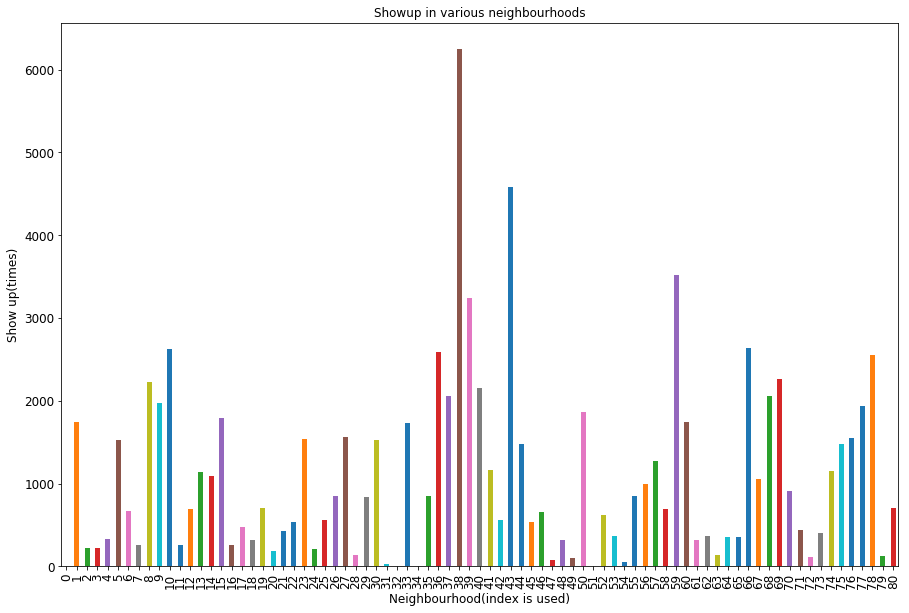

In [10]:
ax=df2['Show_up'].plot(kind='bar', title ="Showup in various neighbourhoods", figsize=(15, 10), fontsize=12)
ax.set_xlabel("Neighbourhood(index is used)", fontsize=12)
ax.set_ylabel("Show up(times)", fontsize=12)
plt.show()

Bar chart is made to show the number of medical appointment show ups in various neighbourhoods. The result of bar chart is consistent with that of scatter chart and shows the maximal medical appointment show ups is over 6000.

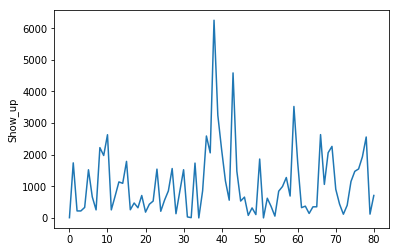

In [11]:
ax = sns.lineplot(x=df2.index, y="Show_up", data=df2)

Line chart is made to show the number of medical appointment show ups in various neighbourhoods. The result is consistent with those of bar chart and scatter plot.

### Question 2: Does message reminding result in more appointment show ups?

In [19]:
df4=df.groupby('PatientId',as_index=False)['SMS_received','Show_up'].sum()

A new dataframe is created to get the number of messages received and appointment show ups in each individual patient.

In [20]:
df4['Show_up'].max()

130.0

The maximal number of appointment show ups is 130 times.

In [21]:
df4['SMS_received'].max()

38

The maximal number of messages received is 38 times.

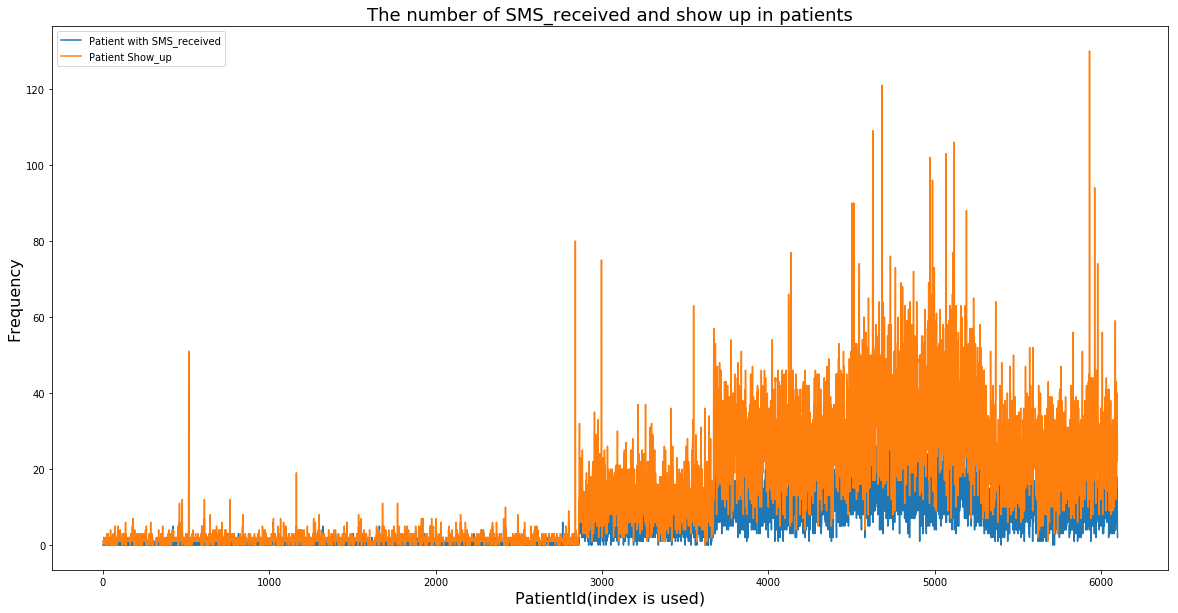

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df4.index, df4['SMS_received'])
plt.plot(df4.index, df4['Show_up'])
plt.legend(['Patient with SMS_received', 'Patient Show_up'], loc='upper left')
plt.xlabel('PatientId(index is used)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('The number of SMS_received and show up in patients', fontsize=18)
plt.show()

Line chart is used to show the number of message received and number of appointment show ups in each patient. The maximal show ups is around 130, the maximal message received is over 30.

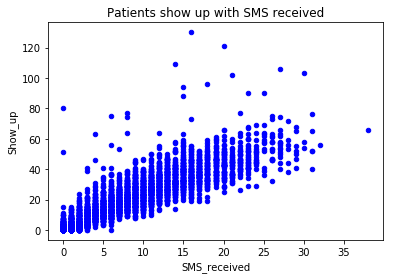

In [19]:
df4.plot(kind='scatter',x='SMS_received',y='Show_up',color='blue')
plt.title('Patients show up with SMS received')
plt.show()

The scatter plot is made to show the relationship of messages received and patient show ups.

In [20]:
np.corrcoef(df4['SMS_received'],df4['Show_up'])

array([[1.        , 0.91560046],
       [0.91560046, 1.        ]])

Show the correlation between message received and petient show ups.

<a id='conclusions'></a>
## Conclusions

For the first question 'Which neighbourhood has the most show ups?' The figures show that most neighbourhoods have appointment show ups between 0 to 2000. The maximal show up is 6252 in neighbourhood called JARDIM CAMBURI.

Limitations: The data that was collected may not represent the whole population data in Brazil. The neighbourhood that has the most show ups in the current data may not be the one that in the whole population in Brazil.

For the second question 'Does message reminding result in more appointment show ups?' The scatter plot shows that the correlation between message received in patient and appointment show ups are in a positive manner. The correlation coefficient of message received and show ups is 0.91560046. The line chart shows the two lines representing message received and patient show ups are in the similar pattern.

Limitations: Both the figures and correlation coefficient show that message received and show ups are positively related. Message received does not mean that patients check the messages in a timely manner. The patients might change the phone number, lose phone or some other reasons that might prevent them from seeing the reminding messages. In addition to messages, some patients might have family members remind them or use other tools to help them show up in their scheduled appointments.


References:
    1. https://pandas.pydata.org/pandas-docs/stable/visualization.html
    2. http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
    3. https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
    4. Udacity data analysis courses

<a id='conclusions'></a>
## Summary

1. For the first question, which neighbourhood has the most show ups? I just want to see the patient appointment show ups in various neighbourhoods and find out which one has the most show ups. First of all, a scatterplot was used to find the overall distribution of the dataset that was created. The figure shows that most neighbourhoods have appointment show ups between 0 to 2000. Then a bar chart and a line chart were plotted to give a better view of the show ups in each neighbourhood. The results are consistent among the charts. It clearly shows that the maximal show up is over 6000. Please see the following charts that were plotted.

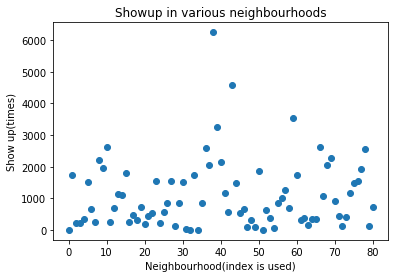

In [15]:
df2=df.groupby('Neighbourhood',as_index=False)['Show_up'].sum()
plt.scatter(df2.index, df2['Show_up'])
plt.xlabel('Neighbourhood(index is used)')
plt.ylabel('Show up(times)')
plt.title('Showup in various neighbourhoods')
plt.show()

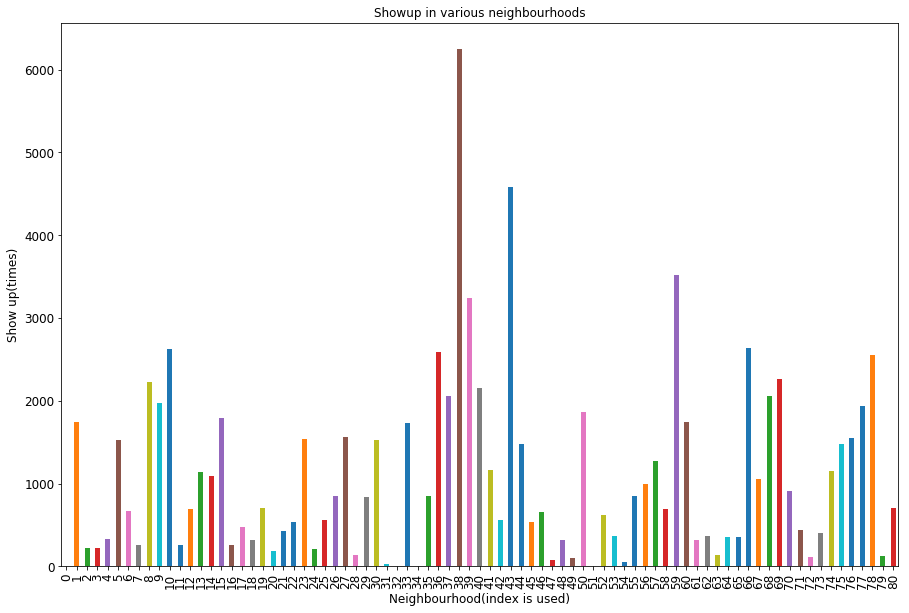

In [16]:
ax=df2['Show_up'].plot(kind='bar', title ="Showup in various neighbourhoods", figsize=(15, 10), fontsize=12)
ax.set_xlabel("Neighbourhood(index is used)", fontsize=12)
ax.set_ylabel("Show up(times)", fontsize=12)
plt.show()

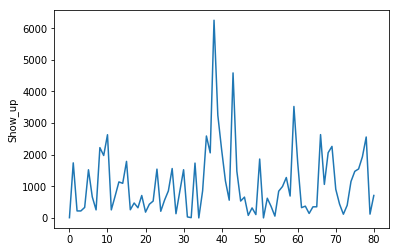

In [17]:
ax = sns.lineplot(x=df2.index, y="Show_up", data=df2)

2. For the second question, does message reminding result in more appointment show ups? I want to find out if messages are helping patients to show up in their medical appointment. Based on patient ID, I was able to create a dataframe to show the number of messages received and their appoinment show ups in each individual patients. A line chart was plotted first to see the overal picture of messages received and appointment show ups in each patient. Then a scatterplot was used to show the relationship between messages received and appointment show ups. Except some outliers, most the data are in a line. It shows that messages received and show ups are positively related. Plesae see the following charts that were plotted.


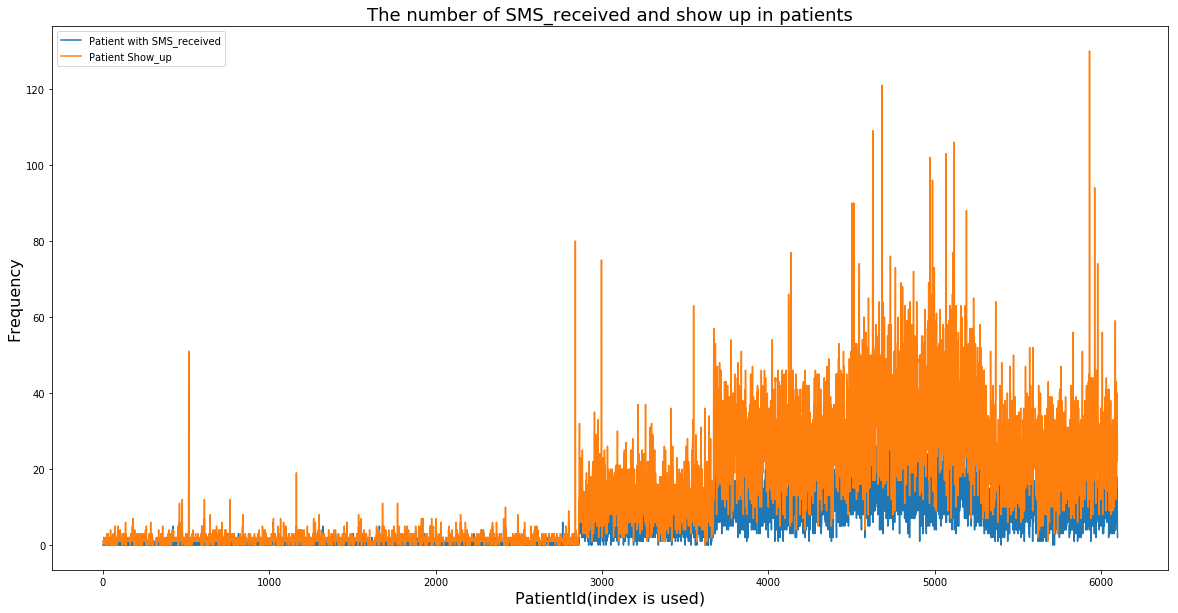

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df4.index, df4['SMS_received'])
plt.plot(df4.index, df4['Show_up'])
plt.legend(['Patient with SMS_received', 'Patient Show_up'], loc='upper left')
plt.xlabel('PatientId(index is used)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('The number of SMS_received and show up in patients', fontsize=18)
plt.show()

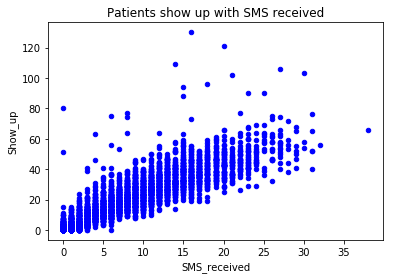

In [23]:
df4.plot(kind='scatter',x='SMS_received',y='Show_up',color='blue')
plt.title('Patients show up with SMS received')
plt.show()